In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score


In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.isnull().sum()
# Checking to see if anything is null in the dataset

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
data[data['Cholesterol'] == 0]
## because cholesterol can't be 0, we will replace it with the mean of the column
## contained 172 rows with 0 cholesterol value

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [8]:
data['Cholesterol'] = data['Cholesterol'].replace(0, data['Cholesterol'].mean())

In [9]:
data[data['RestingBP'] < 40]
# check to see if the resting will fill with the mean blood pressure from the dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,198.799564,0,Normal,155,N,1.5,Flat,1


In [10]:
data['RestingBP'] = data['RestingBP'].replace(0, data['RestingBP'].mean())

In [11]:
transformed_data = data
transformed_data.head(10)
#make a new variable to store the transformed data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120.0,339.0,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130.0,237.0,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110.0,208.0,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140.0,207.0,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120.0,284.0,0,Normal,120,N,0.0,Up,0


In [12]:
transformed_data['Sex'] = transformed_data['Sex'].replace({'M': 1, 'F': 0})
#made sex into a binary colum where 1 = male and 0 = female


In [13]:
#change chestpain type to binary 
# 0 = TA, 1 = ATA, 2 = NAP, 3 = ASY
transformed_data['ChestPainType'] = transformed_data['ChestPainType'].replace({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3})

In [14]:
#change exercise angina to binary where 0 = N and 1 = Y
transformed_data['ExerciseAngina'] = transformed_data['ExerciseAngina'].replace({'N': 0, 'Y': 1})

In [15]:
#change resting ECG to binary where 0 = Normal, 1 = ST, 2 = Left ventricular hypertrophy
transformed_data['RestingECG'] = transformed_data['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2})

In [16]:
#change ST_Slope to binary where 0 = Up, 1 = Flat, 2 = Down
transformed_data['ST_Slope'] = transformed_data['ST_Slope'].replace({'Up': 0, 'Flat': 1, 'Down': 2})

In [17]:
#made sex into a binary column where 1 = male and 0 = female 
#changed chestpain type to binary 
# 0 = TA, 1 = ATA, 2 = NAP, 3 = ASY
#changed exercise angina to binary where 0 = N and 1 = Y
#made sex into a binary colum where 1 = male and 0 = female
#changed resting ECG to binary where 0 = Normal, 1 = ST, 2 = Left ventricular hypertrophy
transformed_data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,0,172,0,0.0,0,0
1,49,0,2,160.0,180.0,0,0,156,0,1.0,1,1
2,37,1,1,130.0,283.0,0,1,98,0,0.0,0,0
3,48,0,3,138.0,214.0,0,0,108,1,1.5,1,1
4,54,1,2,150.0,195.0,0,0,122,0,0.0,0,0
5,39,1,2,120.0,339.0,0,0,170,0,0.0,0,0
6,45,0,1,130.0,237.0,0,0,170,0,0.0,0,0
7,54,1,1,110.0,208.0,0,0,142,0,0.0,0,0
8,37,1,3,140.0,207.0,0,0,130,1,1.5,1,1
9,48,0,1,120.0,284.0,0,0,120,0,0.0,0,0


In [19]:
from sklearn.model_selection import train_test_split

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8659420289855072
Confusion Matrix:
[[ 99  13]
 [ 24 140]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       112
           1       0.92      0.85      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



In [24]:
print(f'Training accuracy: {logreg.score(X_train, y_train)}')
print(f'Test accuracy: {logreg.score(X_test, y_test)}')

Training accuracy: 0.5
Test accuracy: 0.4420289855072464


/home/tylernow/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/tylernow/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


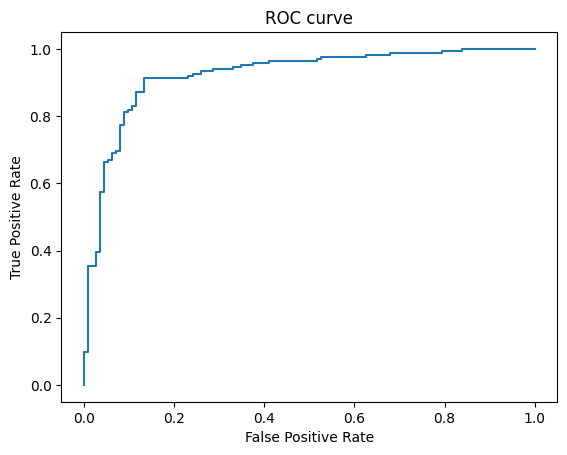

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()